In [1]:
# Ocean Heat Budget Analyses in the Antarctica continental shelf (WAOM)

# Fabio B Dias - 15 August 2023
# Description:
#     this script get the heat transport across 1500m calculate for individual experiments:
# WAOM10: WAOM10extend_shflim_S_0.25Q_Cross-1500m-Transport.ipynb
# WAOM4: WAOM4extend_shflim_S_0.25Q_Cross-1500m-Transport.py
# WAOM4-NOTIDE: WAOM4extend_shflim_S_0.25Q_notides_Cross-1500m-Transport.py
# WAOM2:
# and plot vertically-integrated analyses:
# 1) annual average



In [2]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import gsw

import pyresample

from dask.distributed import Client

import warnings
warnings.filterwarnings('ignore')

In [3]:
tmp_files_dir = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/cross_contour_tmp/'

In [4]:
# determine constants:
rho0 = 1025 # kg. m-3
Cp = 3989.245 # J.kg-1.degC-1
Tf = -1.95 # degC


In [5]:
# load ice draft to create masks
expt = 'WAOM10'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_daily')
# Tf_heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_daily')
heat_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_daily')
vol_transport_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_daily')
temp_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_daily')
salt_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily')
z_rho_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_10km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_10km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_10km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

In [6]:
# define mean currents:
vol_transp_clim_10km = vol_transport_10km.mean('ocean_time')
# overwrite Tf_heat_transport_10km using climatological volume transport*Tf
Tf_heat_transport_10km = vol_transp_clim_10km*Tf*Cp*rho0

In [7]:
%%time

expt = 'WAOM4'

# ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily') # while waiting it to finish calc (9/8/23), calculate it from vol_transp
# Tf_heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

##Tf_heat_transport_4km = vol_transport_4km*rho0*Cp*Tf

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + 'Zrho_1500m_daily') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
# z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
# ds.close()
ds = xr.open_dataset(tmp_files_dir + expt + '_Zrho_1500m') 
z_rho_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m')
dist_along_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m')
lon_along_4km = ds.variables["one"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m')
lat_along_4km = ds.variables["two"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m')
distance_indices_4km = ds.variables["__xarray_dataarray_variable__"]
ds.close()

CPU times: user 59.8 ms, sys: 43.8 ms, total: 104 ms
Wall time: 850 ms


In [8]:
# define mean currents:
vol_transp_clim_4km = vol_transport_4km.mean('ocean_time')
# overwrite Tf_heat_transport_4kmNT using climatological volume transport*Tf
Tf_heat_transport_4km = vol_transp_clim_4km*Tf*Cp*rho0

In [9]:
%%time
expt = 'WAOM4_notides'

ds = xr.open_dataset(tmp_files_dir + expt + '_Tf_heat_trans_1500m_5daily') # while waiting it to finish calc (9/8/23), calculate it from vol_transp
Tf_heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_vol_trans_1500m_5daily')
vol_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

##Tf_heat_transport_4kmNT = vol_transport_4kmNT*rho0*Cp*Tf

ds = xr.open_dataset(tmp_files_dir + expt + '_heat_trans_1500m_5daily')
heat_transport_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_temp_1500m_5daily')
temp_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

ds = xr.open_dataset(tmp_files_dir + expt + '_salt_1500m_5daily')
salt_4kmNT = ds.variables["__xarray_dataarray_variable__"]
ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_z_rho_1500m_daily') # replace for z_rho_1500m_5daily when it finishes (9/8/23)
# z_rho_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_along_1500m_daily')
# dist_along_4kmNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lon_along_1500m_daily')
# lon_along_4kmNT = ds.variables["one"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_lat_along_1500m_daily')
# lat_along_4kmNT = ds.variables["two"]
# ds.close()

# ds = xr.open_dataset(tmp_files_dir + expt + '_dist_indices_1500m_daily')
# distance_indicesNT = ds.variables["__xarray_dataarray_variable__"]
# ds.close()

CPU times: user 29.7 ms, sys: 40.8 ms, total: 70.5 ms
Wall time: 711 ms


In [10]:
# define mean currents:
vol_transp_clim_4kmNT = vol_transport_4kmNT.mean('ocean_time')
# overwrite Tf_heat_transport_4kmNT using climatological volume transport*Tf
Tf_heat_transport_4kmNT = vol_transp_clim_4kmNT*Tf*Cp*rho0

In [11]:
# define along_contour axis with same length for both resolutions:
[dist_along_axis_10km, Zaxis_10km] = np.meshgrid(dist_along_10km, np.arange(0,31))
[dist_along_axis_4km, Zaxis_4km] = np.meshgrid(dist_along_4km, np.arange(0,31))


# Obtain area of the section along the isobath contour:
# first get the distance/dy:
dy_10km_tmp = dist_along_axis_10km[:,1:-1] - dist_along_axis_10km[:,0:-2]
# repeate first and last dy to match size:
dy_10km = np.empty(dist_along_axis_10km.shape)
dy_10km[:,1:-1] =  dy_10km_tmp
dy_10km[:,0] =  dy_10km_tmp[:,0]
dy_10km[:,-1] =  dy_10km_tmp[:,-1]

# 4km: first get the distance/dy:
dy_4km_tmp = dist_along_axis_4km[:,1:-1] - dist_along_axis_4km[:,0:-2]
dy_4km = np.empty(dist_along_axis_4km.shape)
dy_4km[:,1:-1] =  dy_4km_tmp
dy_4km[:,0] =  dy_4km_tmp[:,0]
dy_4km[:,-1] =  dy_4km_tmp[:,-1]

# calculate area 
area_10km = dy_10km*1e6 # convert back to meters:
area_4km = dy_4km*1e6 # convert back to meters:


In [12]:
fig_path = '/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/'


# Binning the HT into density classes (sigma2)

In [13]:
# rho grid for binning:
rho_grid2=np.arange(36,37.5,0.05) # for sigma-2
len_rho_grid2=len(rho_grid2)


In [14]:
# use salt and temp along the contour to calculate sigma theta:
sigma_2_10km = gsw.rho(salt_10km[:,:],temp_10km[:,:],2000) - 1000
sigma_2_4km = gsw.rho(salt_4km[:,:],temp_4km[:,:],2000) - 1000
sigma_2_4kmNT = gsw.rho(salt_4kmNT[:,:],temp_4kmNT[:,:],2000) - 1000

In [15]:
print(heat_transport_10km.shape, Tf_heat_transport_10km.shape)
print(heat_transport_4km.shape, Tf_heat_transport_4km.shape)
print(heat_transport_4kmNT.shape, Tf_heat_transport_4kmNT.shape)

(365, 31, 2588) (31, 2588)
(365, 31, 6919) (31, 6919)
(365, 31, 6919) (31, 6919)


In [16]:
%%time

Net_heat_transport_10km = np.empty(heat_transport_10km.shape)
for tt in np.arange(0,365):
    Net_heat_transport_10km[tt,:] = heat_transport_10km[tt,:] - Tf_heat_transport_10km

Net_heat_transport_4km = np.empty(heat_transport_4km.shape)
for tt in np.arange(0,365):
    Net_heat_transport_4km[tt,:] = heat_transport_4km[tt,:] - Tf_heat_transport_4km

Net_heat_transport_4kmNT = np.empty(heat_transport_4kmNT.shape)
for tt in np.arange(0,365):
    Net_heat_transport_4kmNT[tt,:] = heat_transport_4kmNT[tt,:] - Tf_heat_transport_4kmNT

CPU times: user 915 ms, sys: 1.42 s, total: 2.33 s
Wall time: 2.96 s


### calculate net heat transport (Abs - Tf) across contour per density bin in $\sigma_2$

In [17]:
%%time
# WAOM10

Net_heat_transport_10km_irho2 = np.empty((len(Net_heat_transport_10km[:,0,0]),len_rho_grid2,len(Net_heat_transport_10km[0,:,0]),len(Net_heat_transport_10km[0,0,:])))

for tt in np.arange(0,len(Net_heat_transport_10km[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_2_10km[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid2):
    
            #print(irho)
            heat_trans_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2))), Net_heat_transport_10km[tt,zz,:])

            if irho == 0:
                heat_trans_delta = heat_trans_tmp.copy()
                heat_trans_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
            elif irho == 1:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
                heat_trans_delta = np.stack((heat_trans_delta,heat_trans_tmp), axis=0)
            else:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
                heat_transp_extradim = np.expand_dims(heat_trans_tmp, axis=0)
                heat_trans_delta = np.concatenate((heat_trans_delta,heat_transp_extradim), axis=0)
        
            # print(heat_trans_delta.shape, zz, heat_trans_tmp.shape)
        
            del heat_trans_tmp
    
        Net_heat_transport_10km_irho2[tt,:,zz,:] = heat_trans_delta

#w/ annual mean & w/o vertical integral:
Net_heat_transport_10km_irho2_tavg = np.nanmean(Net_heat_transport_10km_irho2, axis=0)
Net_heat_transport_10km_irho2_tavg_cumsum = np.nancumsum(Net_heat_transport_10km_irho2_tavg, axis=2) # cumsum along contour

#w/o annual mean & w/o vertical integral:
Net_heat_transport_10km_irho2_cumsum = np.nancumsum(Net_heat_transport_10km_irho2, axis=3) # cumsum along contour


CPU times: user 2min 33s, sys: 8.19 s, total: 2min 41s
Wall time: 2min 41s


In [18]:
%%time
# WAOM4

Net_heat_transport_4km_irho2 = np.empty((len(Net_heat_transport_4km[:,0,0]),len_rho_grid2,len(Net_heat_transport_4km[0,:,0]),len(Net_heat_transport_4km[0,0,:])))

for tt in np.arange(0,len(Net_heat_transport_4km[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_2_4km[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid2):
    
            #print(irho)
            heat_trans_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2))), Net_heat_transport_4km[tt,zz,:])

            if irho == 0:
                heat_trans_delta = heat_trans_tmp.copy()
                heat_trans_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
            elif irho == 1:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
                heat_trans_delta = np.stack((heat_trans_delta,heat_trans_tmp), axis=0)
            else:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
                heat_transp_extradim = np.expand_dims(heat_trans_tmp, axis=0)
                heat_trans_delta = np.concatenate((heat_trans_delta,heat_transp_extradim), axis=0)
        
            # print(heat_trans_delta.shape, zz, heat_trans_tmp.shape)
        
            del heat_trans_tmp
    
        Net_heat_transport_4km_irho2[tt,:,zz,:] = heat_trans_delta

#w/ annual mean & w/o vertical integral:
Net_heat_transport_4km_irho2_tavg = np.nanmean(Net_heat_transport_4km_irho2, axis=0)
Net_heat_transport_4km_irho2_tavg_cumsum = np.nancumsum(Net_heat_transport_4km_irho2_tavg, axis=2) # cumsum along contour

#w/o annual mean & w/o vertical integral:
Net_heat_transport_4km_irho2_cumsum = np.nancumsum(Net_heat_transport_4km_irho2, axis=3) # cumsum along contour


CPU times: user 3min 56s, sys: 28.3 s, total: 4min 24s
Wall time: 4min 25s


In [19]:
%%time
# WAOM4-NOTIDES

Net_heat_transport_4kmNT_irho2 = np.empty((len(Net_heat_transport_4kmNT[:,0,0]),len_rho_grid2,len(Net_heat_transport_4kmNT[0,:,0]),len(Net_heat_transport_4kmNT[0,0,:])))

for tt in np.arange(0,len(Net_heat_transport_4kmNT[:,0,0])):

    for zz in np.arange(0,31):
        sigma_tmp = sigma_2_4kmNT[tt,zz,:]
    
        # print(zz)
        for irho in np.arange(0,len_rho_grid2):
    
            #print(irho)
            heat_trans_tmp = ma.masked_where(np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2))), Net_heat_transport_4kmNT[tt,zz,:])

            if irho == 0:
                heat_trans_delta = heat_trans_tmp.copy()
                heat_trans_delta[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
            elif irho == 1:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
                heat_trans_delta = np.stack((heat_trans_delta,heat_trans_tmp), axis=0)
            else:
                heat_trans_tmp[np.logical_or(sigma_tmp <= (rho_grid2[irho]-(0.05/2)),sigma_tmp > (rho_grid2[irho]+(0.05/2)))] = np.nan
                heat_transp_extradim = np.expand_dims(heat_trans_tmp, axis=0)
                heat_trans_delta = np.concatenate((heat_trans_delta,heat_transp_extradim), axis=0)
        
            # print(heat_trans_delta.shape, zz, heat_trans_tmp.shape)
        
            del heat_trans_tmp
    
        Net_heat_transport_4kmNT_irho2[tt,:,zz,:] = heat_trans_delta

#w/ annual mean & w/o vertical integral:
Net_heat_transport_4kmNT_irho2_tavg = np.nanmean(Net_heat_transport_4kmNT_irho2, axis=0)
Net_heat_transport_4kmNT_irho2_tavg_cumsum = np.nancumsum(Net_heat_transport_4kmNT_irho2_tavg, axis=2) # cumsum along contour

#w/o annual mean & w/o vertical integral:
Net_heat_transport_4kmNT_irho2_cumsum = np.nancumsum(Net_heat_transport_4kmNT_irho2, axis=3) # cumsum along contour


CPU times: user 4min 8s, sys: 5min 14s, total: 9min 22s
Wall time: 9min 23s


In [20]:
# now: 

# 1. do movie with a one density class at each subplot, one movie per expt
# 2. calculte the cumsum circumpolar and vert-integ. and plot with one line per density class



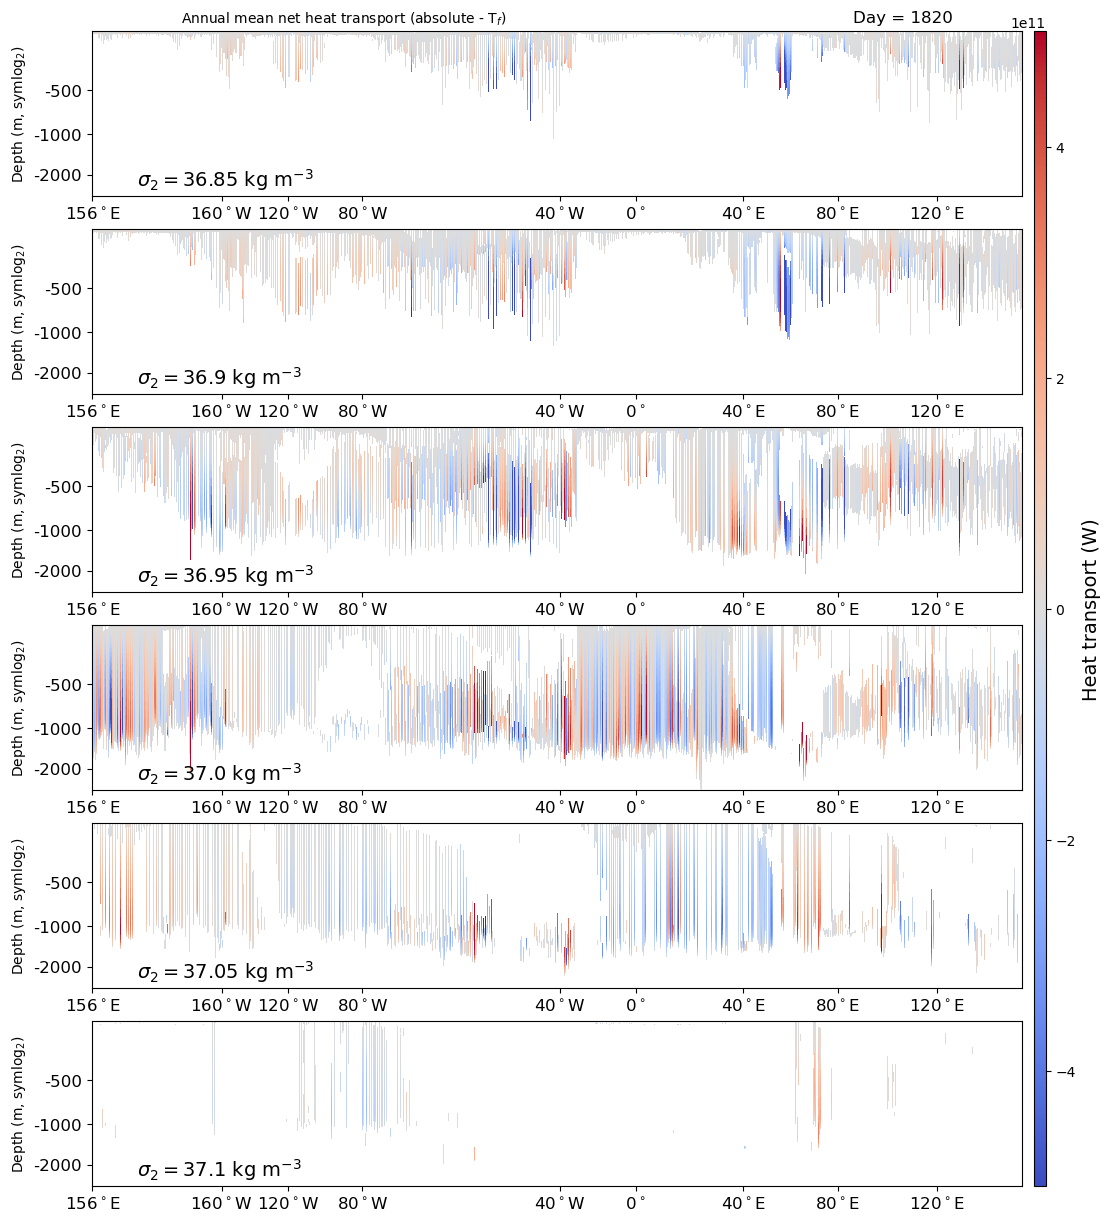

In [21]:
# Annual average for density-cross-1500m transports:
# WAOM10

[dist_along_axis_10km, Zaxis_10km] = np.meshgrid(dist_along_10km, np.arange(0,31))

fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
## ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid2[ll],2)),fontsize=12)
ax[0].text(2,75,'Annual mean net heat transport (absolute - T$_f$)')

ll=17 # 
cht = ax[0].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(Net_heat_transport_10km_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_10km[-1])
ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

ll=18
cht = ax[1].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(Net_heat_transport_10km_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_10km[-1])
ax[1].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

ll=19
cht = ax[2].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(Net_heat_transport_10km_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_10km[-1])
ax[2].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

ll=20
cht = ax[3].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(Net_heat_transport_10km_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[3].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_10km[-1])
ax[3].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[3].set_yscale('symlog',base = 2, linthresh=700)
ax[3].set_ylabel('Depth (m, symlog$_2$)')
ax[3].set_yticklabels(['-2000','-1000','-500'])
ax[3].set_aspect('auto')
ax[3].tick_params(labelsize=12)

ll=21
cht = ax[4].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(Net_heat_transport_10km_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[4].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[4].set_xlim(0, dist_along_10km[-1])
ax[4].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[4].set_yscale('symlog',base = 2, linthresh=700)
ax[4].set_ylabel('Depth (m, symlog$_2$)')
ax[4].set_yticklabels(['-2000','-1000','-500'])
ax[4].set_aspect('auto')
ax[4].tick_params(labelsize=12)
 
ll=22
cht = ax[5].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),np.nanmean(Net_heat_transport_10km_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[5].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[5].set_xlim(0, dist_along_10km[-1])
ax[5].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[5].set_yscale('symlog',base = 2, linthresh=700)
ax[5].set_ylabel('Depth (m, symlog$_2$)')
ax[5].set_yticklabels(['-2000','-1000','-500'])
ax[5].set_aspect('auto')
ax[5].tick_params(labelsize=12)
 
cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10_Net_heat_transp_rho2_annual.png"
plt.savefig(name_fig, dpi=300)


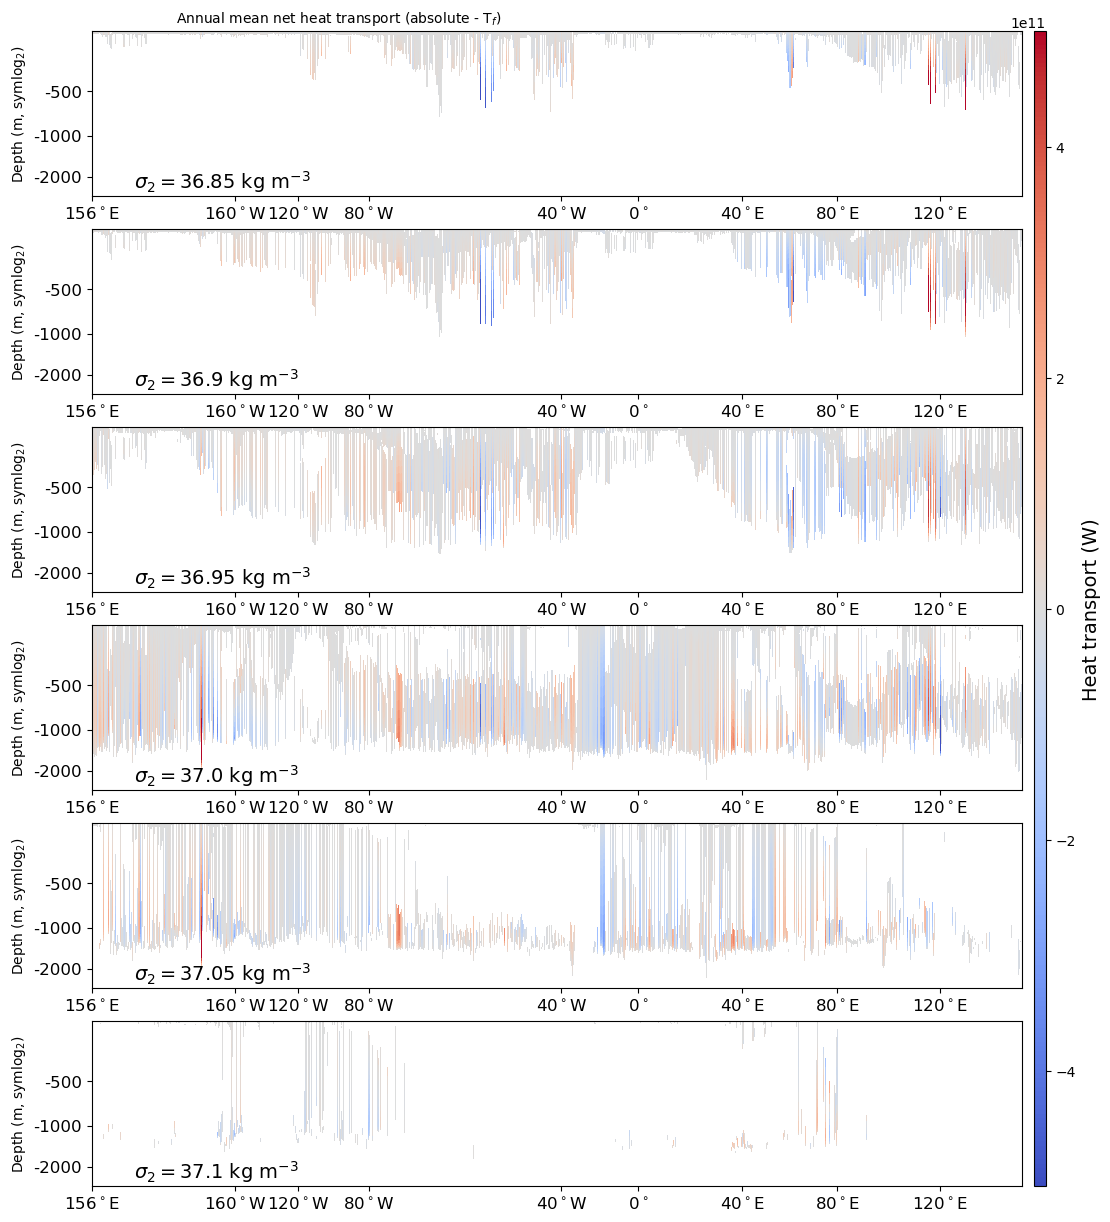

In [22]:
# Annual average for density-cross-1500m transports:
# WAOM4

[dist_along_axis_4km, Zaxis_4km] = np.meshgrid(dist_along_4km, np.arange(0,31))

fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
# ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
## ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid2[ll],2)),fontsize=12)
ax[0].text(2,75,'Annual mean net heat transport (absolute - T$_f$)')

ll=17 # 
cht = ax[0].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(Net_heat_transport_4km_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_4km[-1])
ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

ll=18
cht = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(Net_heat_transport_4km_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])
ax[1].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

ll=19
cht = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(Net_heat_transport_4km_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])
ax[2].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

ll=20
cht = ax[3].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(Net_heat_transport_4km_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[3].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_4km[-1])
ax[3].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[3].set_yscale('symlog',base = 2, linthresh=700)
ax[3].set_ylabel('Depth (m, symlog$_2$)')
ax[3].set_yticklabels(['-2000','-1000','-500'])
ax[3].set_aspect('auto')
ax[3].tick_params(labelsize=12)

ll=21
cht = ax[4].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(Net_heat_transport_4km_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[4].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[4].set_xlim(0, dist_along_4km[-1])
ax[4].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[4].set_yscale('symlog',base = 2, linthresh=700)
ax[4].set_ylabel('Depth (m, symlog$_2$)')
ax[4].set_yticklabels(['-2000','-1000','-500'])
ax[4].set_aspect('auto')
ax[4].tick_params(labelsize=12)
 
ll=22
cht = ax[5].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(Net_heat_transport_4km_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[5].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[5].set_xlim(0, dist_along_4km[-1])
ax[5].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[5].set_yscale('symlog',base = 2, linthresh=700)
ax[5].set_ylabel('Depth (m, symlog$_2$)')
ax[5].set_yticklabels(['-2000','-1000','-500'])
ax[5].set_aspect('auto')
ax[5].tick_params(labelsize=12)
 
cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4_Net_heat_transp_rho2_annual.png"
plt.savefig(name_fig, dpi=300)


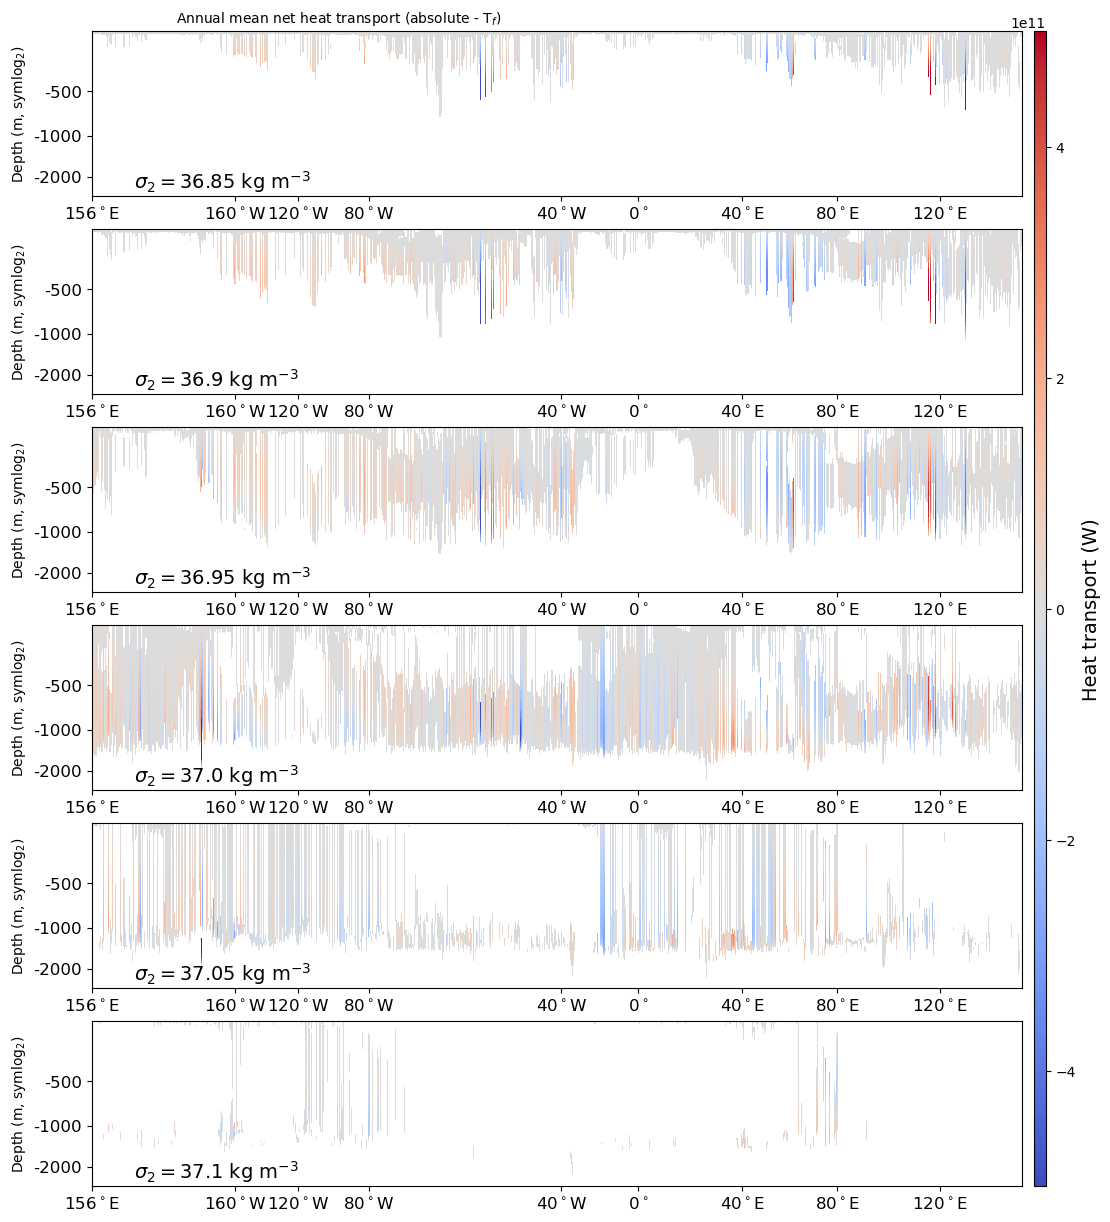

In [23]:
# Annual average for density-cross-1500m transports:
# WAOM4-NOTIDE

fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
# ax[0].text(17,75,'Day = ' + str(tt*5),fontsize=12)
## ax[0].text(2,75,'$\sigma_{\Theta}$ = ' +  str(round(rho_grid2[ll],2)),fontsize=12)
ax[0].text(2,75,'Annual mean net heat transport (absolute - T$_f$)')

ll=17 # 
cht = ax[0].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(Net_heat_transport_4kmNT_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[0].set_xlim(0, dist_along_4km[-1])
ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[0].set_yscale('symlog',base = 2, linthresh=700)
ax[0].set_ylabel('Depth (m, symlog$_2$)')
ax[0].set_yticklabels(['-2000','-1000','-500'])
ax[0].set_aspect('auto')
ax[0].tick_params(labelsize=12)

ll=18
cht = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(Net_heat_transport_4kmNT_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[1].set_xlim(0, dist_along_4km[-1])
ax[1].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[1].set_yscale('symlog',base = 2, linthresh=700)
ax[1].set_ylabel('Depth (m, symlog$_2$)')
ax[1].set_yticklabels(['-2000','-1000','-500'])
ax[1].set_aspect('auto')
ax[1].tick_params(labelsize=12)

ll=19
cht = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(Net_heat_transport_4kmNT_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[2].set_xlim(0, dist_along_4km[-1])
ax[2].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[2].set_yscale('symlog',base = 2, linthresh=700)
ax[2].set_ylabel('Depth (m, symlog$_2$)')
ax[2].set_yticklabels(['-2000','-1000','-500'])
ax[2].set_aspect('auto')
ax[2].tick_params(labelsize=12)

ll=20
cht = ax[3].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(Net_heat_transport_4kmNT_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[3].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                            '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[3].set_xlim(0, dist_along_4km[-1])
ax[3].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[3].set_yscale('symlog',base = 2, linthresh=700)
ax[3].set_ylabel('Depth (m, symlog$_2$)')
ax[3].set_yticklabels(['-2000','-1000','-500'])
ax[3].set_aspect('auto')
ax[3].tick_params(labelsize=12)

ll=21
cht = ax[4].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(Net_heat_transport_4kmNT_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[4].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[4].set_xlim(0, dist_along_4km[-1])
ax[4].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[4].set_yscale('symlog',base = 2, linthresh=700)
ax[4].set_ylabel('Depth (m, symlog$_2$)')
ax[4].set_yticklabels(['-2000','-1000','-500'])
ax[4].set_aspect('auto')
ax[4].tick_params(labelsize=12)
 
ll=22
cht = ax[5].pcolormesh(dist_along_axis_4km,z_rho_4km,np.nanmean(Net_heat_transport_4kmNT_irho2[:,ll,:,:], axis=0), vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
ax[5].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                          '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
ax[5].set_xlim(0, dist_along_4km[-1])
ax[5].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
ax[5].set_yscale('symlog',base = 2, linthresh=700)
ax[5].set_ylabel('Depth (m, symlog$_2$)')
ax[5].set_yticklabels(['-2000','-1000','-500'])
ax[5].set_aspect('auto')
ax[5].tick_params(labelsize=12)
 
cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4-notides_Net_heat_transp_rho2_annual.png"
plt.savefig(name_fig, dpi=300)


## Movies with different isopycnals:


### - WAOM10:

In [24]:
# # Annual average for density-cross-1500m transports:
# # WAOM10

# for tt in range(0,365):
#     fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
#     ax[0].text(17,75,'Day = ' + str(tt),fontsize=12)
#     ax[0].text(2,75,'Daily mean net heat transport (absolute - T$_f$)')

#     ll=17 # 
#     cht = ax[0].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),Net_heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[0].set_xlim(0, dist_along_10km[-1])
#     ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[0].set_yscale('symlog',base = 2, linthresh=700)
#     ax[0].set_ylabel('Depth (m, symlog$_2$)')
#     ax[0].set_yticklabels(['-2000','-1000','-500'])
#     ax[0].set_aspect('auto')
#     ax[0].tick_params(labelsize=12)

#     ll=18
#     cht = ax[1].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),Net_heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[1].set_xlim(0, dist_along_10km[-1])
#     ax[1].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[1].set_yscale('symlog',base = 2, linthresh=700)
#     ax[1].set_ylabel('Depth (m, symlog$_2$)')
#     ax[1].set_yticklabels(['-2000','-1000','-500'])
#     ax[1].set_aspect('auto')
#     ax[1].tick_params(labelsize=12)

#     ll=19
#     cht = ax[2].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),Net_heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[2].set_xlim(0, dist_along_10km[-1])
#     ax[2].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[2].set_yscale('symlog',base = 2, linthresh=700)
#     ax[2].set_ylabel('Depth (m, symlog$_2$)')
#     ax[2].set_yticklabels(['-2000','-1000','-500'])
#     ax[2].set_aspect('auto')
#     ax[2].tick_params(labelsize=12)

#     ll=20
#     cht = ax[3].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),Net_heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[3].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                                 '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[3].set_xlim(0, dist_along_10km[-1])
#     ax[3].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[3].set_yscale('symlog',base = 2, linthresh=700)
#     ax[3].set_ylabel('Depth (m, symlog$_2$)')
#     ax[3].set_yticklabels(['-2000','-1000','-500'])
#     ax[3].set_aspect('auto')
#     ax[3].tick_params(labelsize=12)

#     ll=21
#     cht = ax[4].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),Net_heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[4].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[4].set_xlim(0, dist_along_10km[-1])
#     ax[4].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[4].set_yscale('symlog',base = 2, linthresh=700)
#     ax[4].set_ylabel('Depth (m, symlog$_2$)')
#     ax[4].set_yticklabels(['-2000','-1000','-500'])
#     ax[4].set_aspect('auto')
#     ax[4].tick_params(labelsize=12)
 
#     ll=22
#     cht = ax[5].pcolormesh(dist_along_axis_10km,np.nanmean(z_rho_10km, axis=0),Net_heat_transport_10km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[5].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
#     ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[5].set_xlim(0, dist_along_10km[-1])
#     ax[5].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[5].set_yscale('symlog',base = 2, linthresh=700)
#     ax[5].set_ylabel('Depth (m, symlog$_2$)')
#     ax[5].set_yticklabels(['-2000','-1000','-500'])
#     ax[5].set_aspect('auto')
#     ax[5].tick_params(labelsize=12)
 
#     cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
#     cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
#     cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

#     name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10_Net_heat_transp_rho2_tt=" + str(tt) + ".png"
#     plt.savefig(name_fig, dpi=300)
#     plt.close()

### - WAOM4:

In [25]:
# # Annual average for density-cross-1500m transports:
# # WAOM4

# for tt in range(0,365):
#     fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
#     ax[0].text(17,75,'Day = ' + str(tt),fontsize=12)
#     ax[0].text(2,75,'Daily mean net heat transport (absolute - T$_f$)')

#     ll=17 # 
#     cht = ax[0].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[0].set_xlim(0, dist_along_4km[-1])
#     ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[0].set_yscale('symlog',base = 2, linthresh=700)
#     ax[0].set_ylabel('Depth (m, symlog$_2$)')
#     ax[0].set_yticklabels(['-2000','-1000','-500'])
#     ax[0].set_aspect('auto')
#     ax[0].tick_params(labelsize=12)

#     ll=18
#     cht = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[1].set_xlim(0, dist_along_4km[-1])
#     ax[1].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[1].set_yscale('symlog',base = 2, linthresh=700)
#     ax[1].set_ylabel('Depth (m, symlog$_2$)')
#     ax[1].set_yticklabels(['-2000','-1000','-500'])
#     ax[1].set_aspect('auto')
#     ax[1].tick_params(labelsize=12)

#     ll=19
#     cht = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[2].set_xlim(0, dist_along_4km[-1])
#     ax[2].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[2].set_yscale('symlog',base = 2, linthresh=700)
#     ax[2].set_ylabel('Depth (m, symlog$_2$)')
#     ax[2].set_yticklabels(['-2000','-1000','-500'])
#     ax[2].set_aspect('auto')
#     ax[2].tick_params(labelsize=12)

#     ll=20
#     cht = ax[3].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[3].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                                 '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[3].set_xlim(0, dist_along_4km[-1])
#     ax[3].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[3].set_yscale('symlog',base = 2, linthresh=700)
#     ax[3].set_ylabel('Depth (m, symlog$_2$)')
#     ax[3].set_yticklabels(['-2000','-1000','-500'])
#     ax[3].set_aspect('auto')
#     ax[3].tick_params(labelsize=12)

#     ll=21
#     cht = ax[4].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[4].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[4].set_xlim(0, dist_along_4km[-1])
#     ax[4].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[4].set_yscale('symlog',base = 2, linthresh=700)
#     ax[4].set_ylabel('Depth (m, symlog$_2$)')
#     ax[4].set_yticklabels(['-2000','-1000','-500'])
#     ax[4].set_aspect('auto')
#     ax[4].tick_params(labelsize=12)
 
#     ll=22
#     cht = ax[5].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4km_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[5].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[5].set_xlim(0, dist_along_4km[-1])
#     ax[5].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[5].set_yscale('symlog',base = 2, linthresh=700)
#     ax[5].set_ylabel('Depth (m, symlog$_2$)')
#     ax[5].set_yticklabels(['-2000','-1000','-500'])
#     ax[5].set_aspect('auto')
#     ax[5].tick_params(labelsize=12)
 
#     cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
#     cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
#     cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

#     name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4_Net_heat_transp_rho2_tt=" + str(tt) + ".png"
#     plt.savefig(name_fig, dpi=300)
#     plt.close()

### - WAOM4-NOTIDE:

In [26]:
# # Annual average for density-cross-1500m transports:
# # WAOM4-NOTIDE

# for tt in range(0,365):
#     fig, ax = plt.subplots(nrows=6, figsize = (12, 15))
#     ax[0].text(17,75,'Day = ' + str(tt),fontsize=12)
#     ax[0].text(2,75,'Daily mean net heat transport (absolute - T$_f$)')

#     ll=17 # 
#     cht = ax[0].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4kmNT_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[0].set_xlim(0, dist_along_4km[-1])
#     ax[0].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[0].set_yscale('symlog',base = 2, linthresh=700)
#     ax[0].set_ylabel('Depth (m, symlog$_2$)')
#     ax[0].set_yticklabels(['-2000','-1000','-500'])
#     ax[0].set_aspect('auto')
#     ax[0].tick_params(labelsize=12)

#     ll=18
#     cht = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4kmNT_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[1].set_xlim(0, dist_along_4km[-1])
#     ax[1].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[1].set_yscale('symlog',base = 2, linthresh=700)
#     ax[1].set_ylabel('Depth (m, symlog$_2$)')
#     ax[1].set_yticklabels(['-2000','-1000','-500'])
#     ax[1].set_aspect('auto')
#     ax[1].tick_params(labelsize=12)

#     ll=19
#     cht = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4kmNT_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[2].set_xlim(0, dist_along_4km[-1])
#     ax[2].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[2].set_yscale('symlog',base = 2, linthresh=700)
#     ax[2].set_ylabel('Depth (m, symlog$_2$)')
#     ax[2].set_yticklabels(['-2000','-1000','-500'])
#     ax[2].set_aspect('auto')
#     ax[2].tick_params(labelsize=12)

#     ll=20
#     cht = ax[3].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4kmNT_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[3].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[3].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                                 '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[3].set_xlim(0, dist_along_4km[-1])
#     ax[3].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[3].set_yscale('symlog',base = 2, linthresh=700)
#     ax[3].set_ylabel('Depth (m, symlog$_2$)')
#     ax[3].set_yticklabels(['-2000','-1000','-500'])
#     ax[3].set_aspect('auto')
#     ax[3].tick_params(labelsize=12)

#     ll=21
#     cht = ax[4].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4kmNT_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[4].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[4].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[4].set_xlim(0, dist_along_4km[-1])
#     ax[4].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[4].set_yscale('symlog',base = 2, linthresh=700)
#     ax[4].set_ylabel('Depth (m, symlog$_2$)')
#     ax[4].set_yticklabels(['-2000','-1000','-500'])
#     ax[4].set_aspect('auto')
#     ax[4].tick_params(labelsize=12)
 
#     ll=22
#     cht = ax[5].pcolormesh(dist_along_axis_4km,z_rho_4km,Net_heat_transport_4kmNT_irho2[tt,ll,:,:], vmin=-.5e12 , vmax=.5e12, cmap='coolwarm')
#     ax[5].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
#     ax[5].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
#                               '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
#     ax[5].set_xlim(0, dist_along_4km[-1])
#     ax[5].text(1,-2500,'$\sigma_{2} = $' +  str(round(rho_grid2[ll],2)) + ' kg m$^{-3}$',fontsize=14)
#     ax[5].set_yscale('symlog',base = 2, linthresh=700)
#     ax[5].set_ylabel('Depth (m, symlog$_2$)')
#     ax[5].set_yticklabels(['-2000','-1000','-500'])
#     ax[5].set_aspect('auto')
#     ax[5].tick_params(labelsize=12)
 
#     cax1 = plt.axes([0.91, 0.11, 0.01, 0.77])
#     cb = plt.colorbar(cht, cax=cax1, orientation='vertical')
#     cb.ax.set_ylabel('Heat transport (W)', fontsize=14)

#     name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4-notides_Net_heat_transp_rho2_tt=" + str(tt) + ".png"
#     plt.savefig(name_fig, dpi=300)
#     plt.close()

### movies for T/S/dens sections:

In [ ]:
%%time
# Movie for density/temperature/salinity: WAOM10

for tt in np.arange(0,365):
    fig, ax = plt.subplots(nrows=3, figsize = (12, 9))

    ax[0].text(17,75,'Day = ' + str(tt),fontsize=12)
        
    cst = ax[0].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],sigma_2_10km[tt,:,:], vmin=36.7 , vmax=37.1, cmap='tab20c')
    ax[0].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
    ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[0].set_xlim(0, dist_along_10km[-1])
    ax[0].text(1,-2500,'Pot. density ($\sigma_{2}$)',fontsize=14)
    fig.colorbar(cst, ax=ax[0])
    ax[0].set_yscale('symlog',base = 2, linthresh=700)
    ax[0].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
    ax[0].set_yticklabels(['-2000','-1000','-500'])
    ax[0].set_aspect('auto')
    ax[0].tick_params(labelsize=12)

    ct = ax[1].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],temp_10km[tt,:,:], vmin=-2 , vmax=2, cmap='tab20c')
    ax[1].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
    ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[1].set_xlim(0, dist_along_10km[-1])
    ax[1].text(1,-2500,'Pot. temperature',fontsize=14)
    fig.colorbar(ct, ax=ax[1])
    ax[1].set_yscale('symlog',base = 2, linthresh=700)
    ax[1].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
    ax[1].set_yticklabels(['-2000','-1000','-500'])
    ax[1].set_aspect('auto')
    ax[1].tick_params(labelsize=12)

    cs = ax[2].pcolormesh(dist_along_axis_10km,z_rho_10km[tt,:,:],salt_10km[tt,:,:], vmin=34 , vmax=35, cmap='tab20c')
    ax[2].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
    ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[2].set_xlim(0, dist_along_10km[-1])
    ax[2].text(1,-2500,'Salinity',fontsize=14)
    fig.colorbar(cs, ax=ax[2])
    ax[2].set_yscale('symlog',base = 2, linthresh=700)
    ax[2].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
    ax[2].set_yticklabels(['-2000','-1000','-500'])
    ax[2].set_aspect('auto')
    ax[2].tick_params(labelsize=12)

    name_fig="/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10_sig2_temp_salt_tt=" + str(tt) + ".png"
    plt.savefig(name_fig, dpi=300)
    plt.close()

In [ ]:
%%time
# Movie for density/temperature/salinity: WAOM4

for tt in np.arange(0,365):
    fig, ax = plt.subplots(nrows=3, figsize = (12, 9))

    ax[0].text(17,75,'Day = ' + str(tt),fontsize=12)
        
    cst = ax[0].pcolormesh(dist_along_axis_4km,z_rho_4km,sigma_2_4km[tt,:,:], vmin=36.7 , vmax=37.1, cmap='tab20c')
    ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
    ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[0].set_xlim(0, dist_along_4km[-1])
    ax[0].text(1,-2500,'Pot. density ($\sigma_{2}$)',fontsize=14)
    fig.colorbar(cst, ax=ax[0])
    ax[0].set_yscale('symlog',base = 2, linthresh=700)
    ax[0].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
    ax[0].set_yticklabels(['-2000','-1000','-500'])
    ax[0].set_aspect('auto')
    ax[0].tick_params(labelsize=12)

    ct = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,temp_4km[tt,:,:], vmin=-2 , vmax=2, cmap='tab20c')
    ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
    ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[1].set_xlim(0, dist_along_4km[-1])
    ax[1].text(1,-2500,'Pot. temperature',fontsize=14)
    fig.colorbar(ct, ax=ax[1])
    ax[1].set_yscale('symlog',base = 2, linthresh=700)
    ax[1].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
    ax[1].set_yticklabels(['-2000','-1000','-500'])
    ax[1].set_aspect('auto')
    ax[1].tick_params(labelsize=12)

    cs = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,salt_4km[tt,:,:], vmin=34 , vmax=35, cmap='tab20c')
    ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
    ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[2].set_xlim(0, dist_along_4km[-1])
    ax[2].text(1,-2500,'Salinity',fontsize=14)
    fig.colorbar(cs, ax=ax[2])
    ax[2].set_yscale('symlog',base = 2, linthresh=700)
    ax[2].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
    ax[2].set_yticklabels(['-2000','-1000','-500'])
    ax[2].set_aspect('auto')
    ax[2].tick_params(labelsize=12)

    name_fig="/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4_sig2_temp_salt_tt=" + str(tt) + ".png"
    plt.savefig(name_fig, dpi=300)
    plt.close()

In [ ]:
%%time
# Movie for density/temperature/salinity: WAOM4-NOTIDE

for tt in np.arange(0,365):
    fig, ax = plt.subplots(nrows=3, figsize = (12, 9))

    ax[0].text(17,75,'Day = ' + str(tt),fontsize=12)
        
    cst = ax[0].pcolormesh(dist_along_axis_4km,z_rho_4km,sigma_2_4kmNT[tt,:,:], vmin=36.7 , vmax=37.1, cmap='tab20c')
    ax[0].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
    ax[0].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[0].set_xlim(0, dist_along_4km[-1])
    ax[0].text(1,-2500,'Pot. density ($\sigma_{2}$)',fontsize=14)
    fig.colorbar(cst, ax=ax[0])
    ax[0].set_yscale('symlog',base = 2, linthresh=700)
    ax[0].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
    ax[0].set_yticklabels(['-2000','-1000','-500'])
    ax[0].set_aspect('auto')
    ax[0].tick_params(labelsize=12)

    ct = ax[1].pcolormesh(dist_along_axis_4km,z_rho_4km,temp_4kmNT[tt,:,:], vmin=-2 , vmax=2, cmap='tab20c')
    ax[1].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
    ax[1].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[1].set_xlim(0, dist_along_4km[-1])
    ax[1].text(1,-2500,'Pot. temperature',fontsize=14)
    fig.colorbar(ct, ax=ax[1])
    ax[1].set_yscale('symlog',base = 2, linthresh=700)
    ax[1].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
    ax[1].set_yticklabels(['-2000','-1000','-500'])
    ax[1].set_aspect('auto')
    ax[1].tick_params(labelsize=12)

    cs = ax[2].pcolormesh(dist_along_axis_4km,z_rho_4km,salt_4kmNT[tt,:,:], vmin=34 , vmax=35, cmap='tab20c')
    ax[2].set_xticks(dist_along_4km[distance_indices_4km.astype(int)[:]])
    ax[2].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$','40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[2].set_xlim(0, dist_along_4km[-1])
    ax[2].text(1,-2500,'Salinity',fontsize=14)
    fig.colorbar(cs, ax=ax[2])
    ax[2].set_yscale('symlog',base = 2, linthresh=700)
    ax[2].set_ylabel('Depth (m, symlog$_2$)',fontsize=12)
    ax[2].set_yticklabels(['-2000','-1000','-500'])
    ax[2].set_aspect('auto')
    ax[2].tick_params(labelsize=12)

    name_fig="/g/data3/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom4-notides_sig2_temp_salt_tt=" + str(tt) + ".png"
    plt.savefig(name_fig, dpi=300)
    plt.close()

## Doing some TS-diagrams:

In [30]:
# make grid for density contours
smin = 30 - (0.01 * 30)    #salt_ctrl_subregR.min - (0.01 * salt_ctrl_subregR.min)
smax = 36. + (0.01 * 36.)    #salt_ctrl_subregR.max + (0.01 * salt_ctrl_subregR.max)
tmin = -4. + (0.1 * -4.)       #temp_ctrl_subregR.min - (0.1 * temp_ctrl_subregR.max)
tmax = 5 + (0.1 * 5.)       #temp_ctrl_subregR.max + (0.1 * temp_ctrl_subregR.max)
print('tmin, tmax, smin, smax sizes=,', tmin, tmax, smin, smax)
# Calculate how many gridcells we need in the x and y dimensions
xdim = 30
ydim = 20
# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(-4,5,ydim)
si = np.linspace(31,36,xdim)

Si, Ti = np.meshgrid(si, ti, sparse=False, indexing='ij')
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens[j,i]=gsw.rho(si[i],ti[j],2000) # sigma-2000
# Substract 1000 to convert to sigma-2
dens = dens - 1000

tmin, tmax, smin, smax sizes=, -4.4 5.5 29.7 36.36


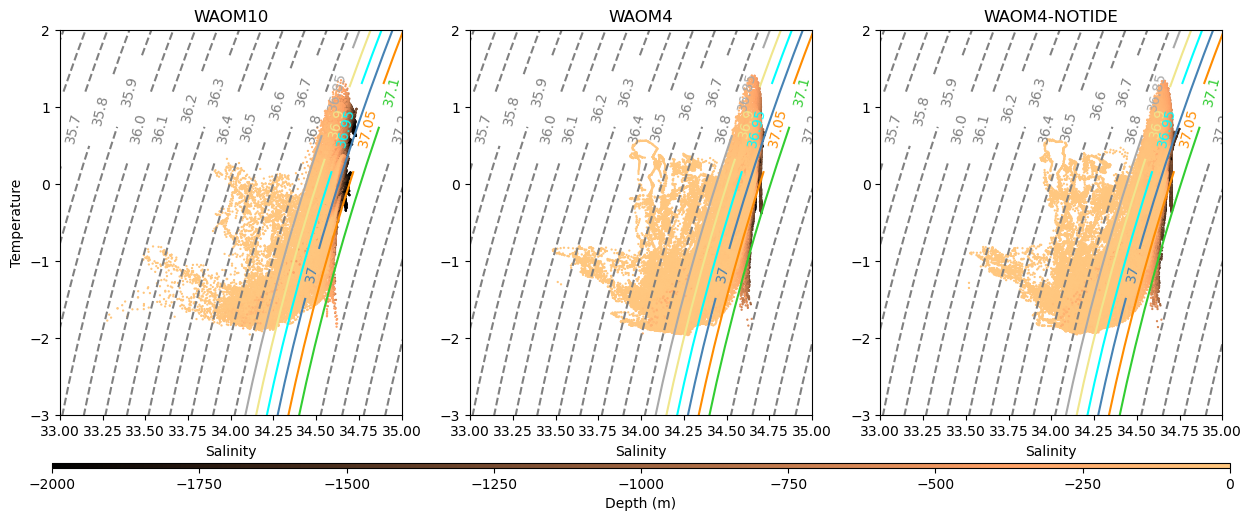

In [31]:
fig, ax = plt.subplots(ncols=3, figsize = (15, 5))
# normal isopycnals
for aa in range(0,3):
    CS1 = ax[aa].contour(Si,Ti,dens.transpose(), levels=np.arange(35.5,36.9,.1),linestyles='dashed', colors=[(.5,0.5,0.5)], linewidth=0.1)
    ax[aa].clabel(CS1, CS1.levels, inline=True, fontsize=10)
    CS2 = ax[aa].contour(Si,Ti,dens.transpose(), levels=np.arange(37.2,38,.1),linestyles='dashed', colors=[(.5,0.5,0.5)], linewidth=0.1)
    ax[aa].clabel(CS2, CS2.levels, inline=True, fontsize=10)
    # specific isopycnals
    cc1 = ax[aa].contour(Si,Ti,dens.transpose(), levels=[36.85],linestyles='solid', colors='darkgrey', linewidth=0.1)
    ax[aa].clabel(cc1, cc1.levels, inline=True, fontsize=10)
    cc2 = ax[aa].contour(Si,Ti,dens.transpose(), levels=[36.9],linestyles='solid', colors='khaki', linewidth=0.1)
    ax[aa].clabel(cc2, cc2.levels, inline=True, fontsize=10)
    cc3 = ax[aa].contour(Si,Ti,dens.transpose(), levels=[36.95],linestyles='solid', colors='aqua', linewidth=0.1)
    ax[aa].clabel(cc3, cc3.levels, inline=True, fontsize=10)
    cc4 = ax[aa].contour(Si,Ti,dens.transpose(), levels=[37.0],linestyles='solid', colors='steelblue', linewidth=0.1)
    ax[aa].clabel(cc4, cc4.levels, inline=True, fontsize=10)
    cc5 = ax[aa].contour(Si,Ti,dens.transpose(), levels=[37.05],linestyles='solid', colors='darkorange', linewidth=0.1)
    ax[aa].clabel(cc5, cc5.levels, inline=True, fontsize=10)
    cc6 = ax[aa].contour(Si,Ti,dens.transpose(), levels=[37.1],linestyles='solid', colors='limegreen', linewidth=0.1)
    ax[aa].clabel(cc6, cc6.levels, inline=True, fontsize=10)
    ax[aa].set_xlim([33,35])
    ax[aa].set_ylim([-3,2])
    ax[aa].set_xlabel('Salinity')
    if aa == 0:
        ax[aa].set_ylabel('Temperature')

sc = ax[0].scatter(np.nanmean(salt_10km,axis=0),np.nanmean(temp_10km,axis=0),
                 c=np.nanmean(z_rho_10km,axis=0),marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap='copper', vmin=-2000, vmax=0)
ax[0].set_title('WAOM10')

sc = ax[1].scatter(np.nanmean(salt_4km,axis=0),np.nanmean(temp_4km,axis=0),
                 c=z_rho_4km,marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap='copper', vmin=-2000, vmax=0)
ax[1].set_title('WAOM4')

sc = ax[2].scatter(np.nanmean(salt_4kmNT,axis=0),np.nanmean(temp_4kmNT,axis=0),
                 c=z_rho_4km,marker="p", s=(72./fig.dpi)**2, 
                 label='Annual avg', cmap='copper', vmin=-2000, vmax=0)
ax[2].set_title('WAOM4-NOTIDE')

cbar_ax1 = fig.add_axes([0.12, 0.005, 0.785, 0.01])
fig.colorbar(sc, cax=cbar_ax1, orientation='horizontal')
cbar_ax1.set_xlabel('Depth (m)')

name_fig="/g/data/hh5/tmp/access-om/fbd581/ROMS/postprocessing/figs/OHB_shelf/sigma_2/waom10x4x4NT_TSdiag_rho2_annnual.png"
plt.savefig(name_fig, dpi=300)

# integrated over circumpolar domain per density classes:

In [32]:
%%time

# Calculate total sum per density bin:

Sum_10km_sigma2 = np.empty(len(rho_grid2)) # 
for ll in np.arange(len(rho_grid2)-1,0,-1):
    Sum_10km_sigma2[ll] = np.nansum(np.nansum(np.nanmean(Net_heat_transport_10km_irho2[:,ll,:,:], axis=0),axis=0))

Sum_4km_sigma2 = np.empty(len(rho_grid2)) # 
# for ll in np.arange(0,len(rho_grid2),1):
for ll in np.arange(len(rho_grid2)-1,0,-1):
    Sum_4km_sigma2[ll] = np.nansum(np.nansum(np.nanmean(Net_heat_transport_4km_irho2[:,ll,:,:], axis=0),axis=0))

Sum_4kmNT_sigma2 = np.empty(len(rho_grid2)) # 
# for ll in np.arange(0,len(rho_grid2),1):
for ll in np.arange(len(rho_grid2)-1,0,-1):
    Sum_4kmNT_sigma2[ll] = np.nansum(np.nansum(np.nanmean(Net_heat_transport_4kmNT_irho2[:,ll,:,:], axis=0),axis=0))



CPU times: user 29.1 s, sys: 12 s, total: 41.1 s
Wall time: 41.1 s


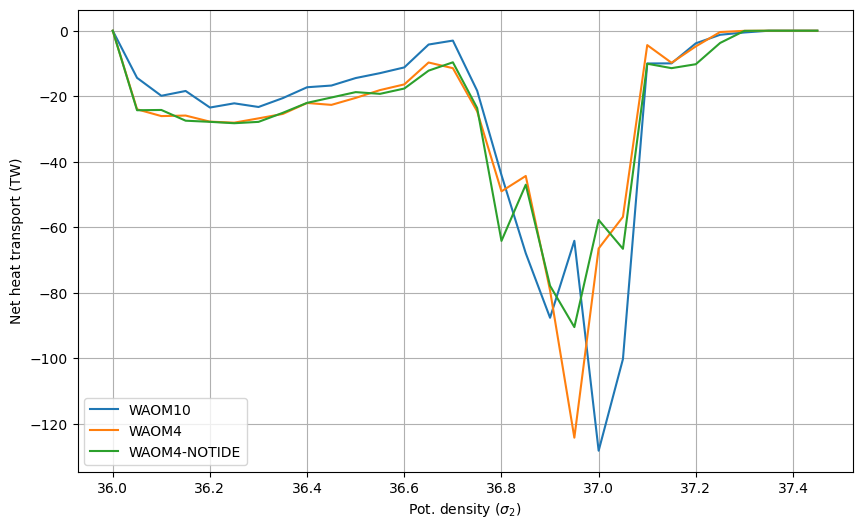

In [33]:
fig, ax = plt.subplots(ncols=1, figsize = (10, 6))

ax.plot(rho_grid2,Sum_10km_sigma2*1e-12, label='WAOM10')
ax.plot(rho_grid2,Sum_4km_sigma2*1e-12, label='WAOM4')
ax.plot(rho_grid2,Sum_4kmNT_sigma2*1e-12, label='WAOM4-NOTIDE')
ax.legend()
ax.grid()

ax.set_ylabel('Net heat transport (TW)')# (Abs-T$_{f}$, 10$^{15}$W'])
ax.set_xlabel('Pot. density ($\sigma_2$)')

name_fig='WAOM10x4x4NT_Cross-1500m_cumtransport_Sigma2bin_vint_annual.png'
plt.savefig(fig_path + name_fig, dpi=300)

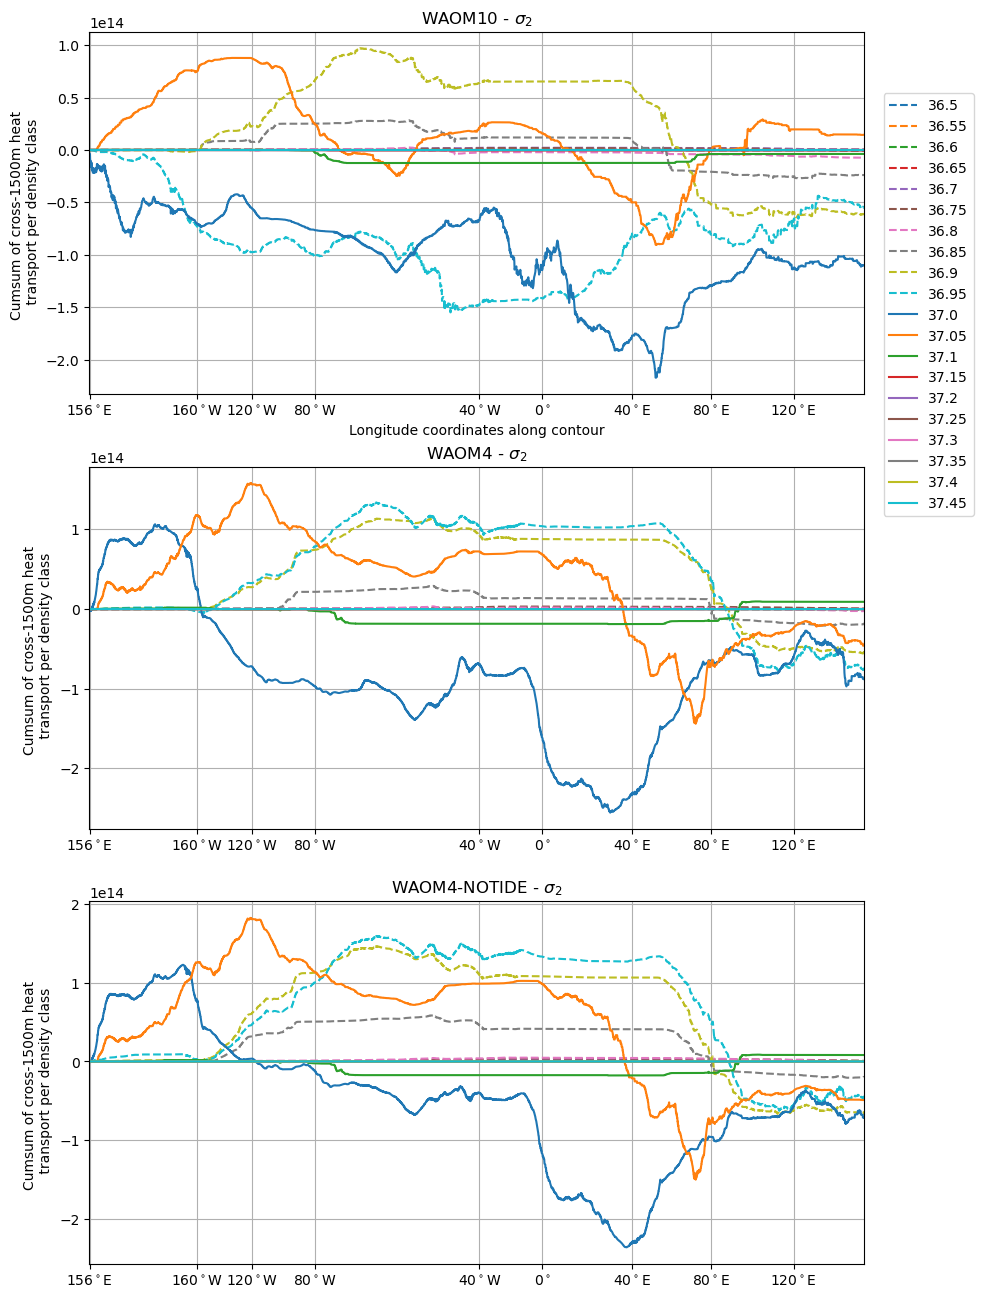

In [34]:
# plot sigma_2

fig, ax = plt.subplots(nrows=3, figsize = (10, 16))

xx=0
for ll in np.arange(10,20,1):
    ax[0].plot(dist_along_10km,np.sum(np.nanmean(Net_heat_transport_10km_irho2_cumsum[:,ll,:,:], axis=0),axis=0),'--',label=str(round(rho_grid2[ll],2)))       # 1. time-mean, 2. vertical integral
    ax[1].plot(dist_along_4km,np.sum(np.nanmean(Net_heat_transport_4km_irho2_cumsum[:,ll,:,:], axis=0),axis=0),'--',label=str(round(rho_grid2[ll],2)))       # 1. time-mean, 2. vertical integral
    ax[2].plot(dist_along_4km,np.sum(np.nanmean(Net_heat_transport_4kmNT_irho2_cumsum[:,ll,:,:], axis=0),axis=0),'--',label=str(round(rho_grid2[ll],2)))       # 1. time-mean, 2. vertical integral
for ll in np.arange(20,30,1):
    ax[0].plot(dist_along_10km,np.sum(np.nanmean(Net_heat_transport_10km_irho2_cumsum[:,ll,:,:], axis=0),axis=0),'-',label=str(round(rho_grid2[ll],2)))       # 1. time-mean, 2. vertical integral
    ax[1].plot(dist_along_4km,np.sum(np.nanmean(Net_heat_transport_4km_irho2_cumsum[:,ll,:,:], axis=0),axis=0),'-',label=str(round(rho_grid2[ll],2)))       # 1. time-mean, 2. vertical integral
    ax[2].plot(dist_along_4km,np.sum(np.nanmean(Net_heat_transport_4kmNT_irho2_cumsum[:,ll,:,:], axis=0),axis=0),'-',label=str(round(rho_grid2[ll],2)))       # 1. time-mean, 2. vertical integral

for aa in range(0,3):
    ax[aa].set_xticks(dist_along_10km[distance_indices_10km.astype(int)[:]])
    ax[aa].set_xticklabels(('156$^\circ$E','160$^\circ$W', '120$^\circ$W','80$^\circ$W', '40$^\circ$W', '0$^\circ$', 
                              '40$^\circ$E', '80$^\circ$E', '120$^\circ$E'))
    ax[aa].set_xlim(0, dist_along_10km[-1])
    # ax.set_ylim(-1.5e14, 8e14)
    ax[aa].set_ylabel('Cumsum of cross-1500m heat \n transport per density class') #   'Cumulative heat transport \n across 1500m isobath (W)');
    ax[aa].grid('on')
    if aa==0:
        ax[aa].set_xlabel('Longitude coordinates along contour')
        ax[aa].legend(loc='best', bbox_to_anchor=(0.7, 0.35, 0.45, 0.5))
    
ax[0].set_title('WAOM10 - $\sigma_{2}$')
ax[1].set_title('WAOM4 - $\sigma_{2}$')
ax[2].set_title('WAOM4-NOTIDE - $\sigma_{2}$')

name_fig='WAOM10x4x4NT_Cross-1500m_cumtransport_Sigma2bin_vint_annual.png'
plt.savefig(fig_path + name_fig, dpi=300)


In [35]:
# print integrated values:

print('====================================================')
print('Sigma Net 2 - WAOM10 = ',np.nansum(Sum_10km_sigma2)*1e-12,' TW')
print('Sigma Net 2 - WAOM4 = ',np.nansum(Sum_4km_sigma2)*1e-12,' TW')
print('Sigma Net 2 - WAOM4-NOTIDE = ',np.nansum(Sum_4kmNT_sigma2)*1e-12,' TW')
print('====================================================')


Sigma Net 2 - WAOM10 =  -757.7938737739406  TW
Sigma Net 2 - WAOM4 =  -768.7222345818635  TW
Sigma Net 2 - WAOM4-NOTIDE =  -767.4744426085028  TW
